## Euro 2024 Winner Prediction


In [4]:
#iimportando librerias principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# Importando el dataset
dataset = pd.read_csv('euro2024_players.csv')
dataset

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany
3,Nico Schlotterbeck,Centre-Back,24,Borussia Dortmund,191,left,12,0,40000000,Germany
4,Jonathan Tah,Centre-Back,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany
...,...,...,...,...,...,...,...,...,...,...
618,Adam Hlozek,Second Striker,21,Bayer 04 Leverkusen,188,right,31,2,12000000,Czech Republic
619,Patrik Schick,Centre-Forward,28,Bayer 04 Leverkusen,191,left,37,18,22000000,Czech Republic
620,Mojmír Chytil,Centre-Forward,25,SK Slavia Prague,187,-,12,4,6500000,Czech Republic
621,Jan Kuchta,Centre-Forward,27,AC Sparta Prague,185,right,20,3,5000000,Czech Republic


### EDA

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         623 non-null    object
 1   Position     623 non-null    object
 2   Age          623 non-null    int64 
 3   Club         623 non-null    object
 4   Height       623 non-null    int64 
 5   Foot         620 non-null    object
 6   Caps         623 non-null    int64 
 7   Goals        623 non-null    int64 
 8   MarketValue  623 non-null    int64 
 9   Country      623 non-null    object
dtypes: int64(5), object(5)
memory usage: 48.8+ KB


In [8]:
dataset[dataset.duplicated()] # verificando filas duplicadas

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country


In [9]:
dataset.isna().sum() # verificando valores faltantes

Name           0
Position       0
Age            0
Club           0
Height         0
Foot           3
Caps           0
Goals          0
MarketValue    0
Country        0
dtype: int64

In [10]:
# columnas que no aportan informacion y tienen valores faltantes
limpieza = ['Foot']
dataset.drop(columns=limpieza, inplace=True)
dataset = dataset.dropna()

In [11]:
# Posiciones del dataset original
dataset['Position'].unique()

array(['Goalkeeper', 'Centre-Back', 'Left-Back', 'Right-Back',
       'Defensive Midfield', 'Central Midfield', 'Attacking Midfield',
       'Left Winger', 'Right Winger', 'Second Striker', 'Centre-Forward',
       'Right Midfield', 'Left Midfield'], dtype=object)

In [12]:
# Definiendo el diccionario de mapeo para clasificar las posiciones unicamente en 4 en vez de 13
posicion_mapeo = {
    'Goalkeeper': 'Goalkeeper',
    'Centre-Back': 'Full-Back',
    'Right-Back': 'Full-Back',
    'Left-Back': 'Full-Back',
    'Defensive Midfield': 'Midfielder',
    'Central Midfield': 'Midfielder',
    'Attacking Midfield': 'Midfielder',
    'Right Midfield': 'Midfielder',
    'Left Midfield': 'Midfielder',
    'Right Winger': 'Forward',
    'Left Winger': 'Forward',
    'Second Striker': 'Forward',
    'Centre-Forward': 'Forward'
}

In [13]:
#Transformando la variable 'position'
dataset['Position'] = dataset['Position'].replace(posicion_mapeo)


In [14]:
dataset.describe()

,Age,Height,Caps,Goals,MarketValue
count,623.000000,623.000000,623.000000,623.000000,6.230000e+02
mean,27.040128,184.181380,30.338684,4.152488,1.840903e+07
std,4.124275,6.569258,30.987902,10.086803,2.426195e+07
min,16.000000,167.000000,0.000000,0.000000,5.000000e+04
25%,24.000000,180.000000,7.000000,0.000000,2.900000e+06
50%,27.000000,185.000000,21.000000,1.000000,9.000000e+06
75%,30.000000,189.000000,42.000000,4.000000,2.500000e+07
max,41.000000,202.000000,206.000000,128.000000,1.800000e+08


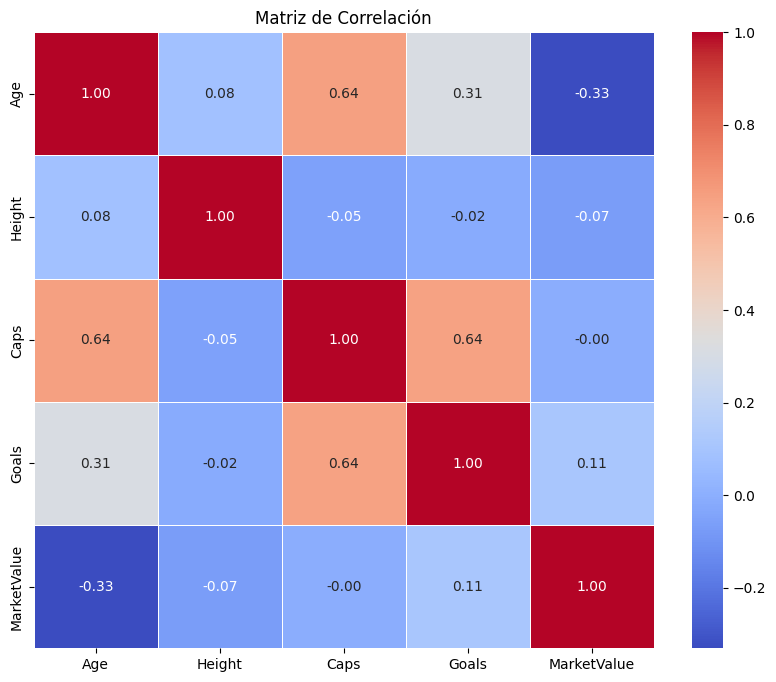

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
numeric_df = dataset.select_dtypes(include='number')

# Calcular la matriz de correlación
corr_matrix = numeric_df.corr()

# Visualizarla con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

No hay relacion entre Market Value y Caps por lo que no se pueden considerar sustitutos. Se trabajaran de forma independiente

### Faeture Engineering

In [38]:
# Calcular índice de valor de mercado
country_marketValue = dataset.groupby('Country')['MarketValue'].mean().reset_index()
country_marketValue.columns = ['Country', 'MeanMarketValue']
eurocopa_marketValue = country_marketValue['MeanMarketValue'].sum()
country_marketValue['country_marketValue'] = country_marketValue['MeanMarketValue'] / eurocopa_marketValue

# Calcular índice de experiencia (suma de 'Caps')
country_totalCaps = dataset.groupby('Country')['Caps'].sum().reset_index()
country_totalCaps.columns = ['Country', 'TotalCaps']
eurocopa_totalCaps = country_totalCaps['TotalCaps'].sum()
country_totalCaps['Country_experience'] = country_totalCaps['TotalCaps'] / eurocopa_totalCaps

# Unir ambos índices en un solo DataFrame por país
country_summary = pd.merge(country_marketValue, country_totalCaps[['Country', 'Country_experience']], on='Country')

# resultado
print(country_summary[['Country', 'country_marketValue', 'Country_experience']])


           Country  country_marketValue  Country_experience
0          Albania             0.009676            0.035924
1          Austria             0.020418            0.032432
2          Belgium             0.052705            0.050209
3          Croatia             0.028412            0.060949
4   Czech Republic             0.016812            0.021427
5          Denmark             0.036025            0.056664
6          England             0.131354            0.034443
7           France             0.111270            0.044230
8          Georgia             0.013885            0.039680
9          Germany             0.073784            0.047934
10         Hungary             0.014258            0.039680
11           Italy             0.061169            0.027988
12     Netherlands             0.073264            0.044336
13          Poland             0.017734            0.043648
14        Portugal             0.091428            0.058886
15         Romania             0.007987 

### Clustering: Sobre experiencia y Valor de mercado por pais 

#### KMeans

In [63]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Seleccionar las variables
data = country_summary[['country_marketValue', 'Country_experience']]

# Normalización de los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Aplicar K-Means (suponiendo que queremos 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
country_summary['Cluster'] = kmeans.fit_predict(scaled_data)


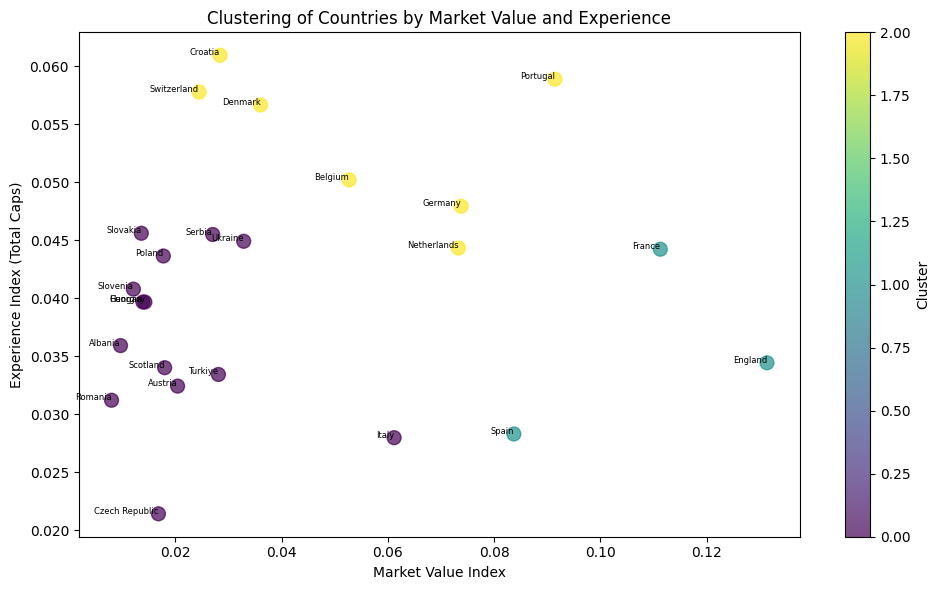

In [ ]:
import matplotlib.pyplot as plt

# Graficar los clusters
fig, ax = plt.subplots(figsize=(10, 6))

# Crear el gráfico de dispersión con los clusters
scatter = ax.scatter(country_summary['country_marketValue'], country_summary['Country_experience'],
                     c=country_summary['Cluster'], cmap='viridis', s=100, alpha=0.7)

# Añadir etiquetas a los ejes
ax.set_xlabel('Market Value Index')
ax.set_ylabel('Experience Index (Total Caps)')

# Título del gráfico
ax.set_title('Clustering of Countries by Market Value and Experience')

# Añadir leyenda
plt.colorbar(scatter, label='Cluster')

# Añadir los nombres de los países en cada punto
for i, row in country_summary.iterrows():
    ax.text(row['country_marketValue'], row['Country_experience'], row['Country'], fontsize=6, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


#### MeanShift

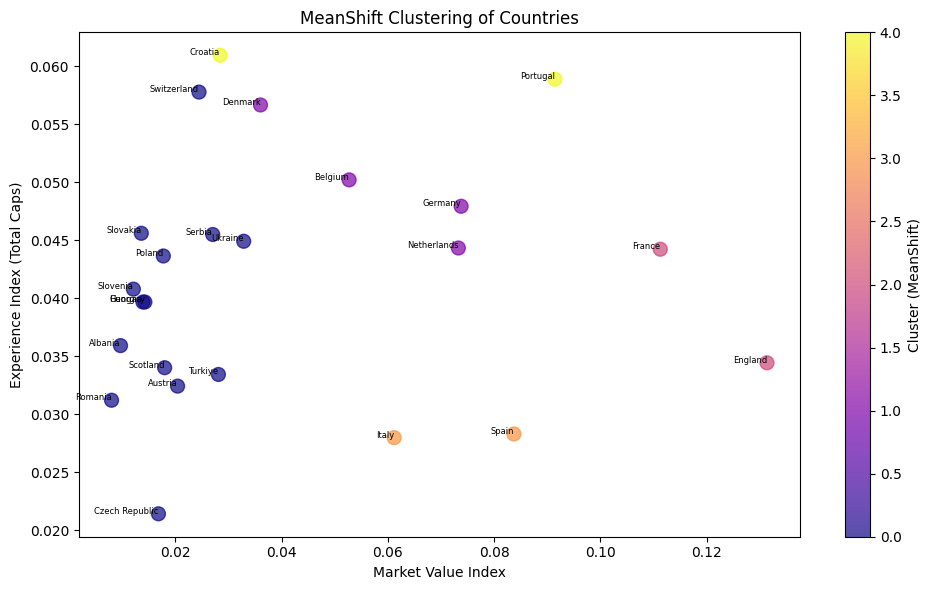

Número de clusters detectados por MeanShift: 5


In [67]:
from sklearn.cluster import MeanShift

# Aplicar MeanShift
meanshift = MeanShift()
country_summary['Cluster_MS'] = meanshift.fit_predict(scaled_data)

# Graficar
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(country_summary['country_marketValue'], country_summary['Country_experience'],
                     c=country_summary['Cluster_MS'], cmap='plasma', s=100, alpha=0.7)

ax.set_xlabel('Market Value Index')
ax.set_ylabel('Experience Index (Total Caps)')
ax.set_title('MeanShift Clustering of Countries')

plt.colorbar(scatter, label='Cluster (MeanShift)')

for i, row in country_summary.iterrows():
    ax.text(row['country_marketValue'], row['Country_experience'], row['Country'], fontsize=6, ha='right')

plt.tight_layout()
plt.show()

print(f"Número de clusters detectados por MeanShift: {country_summary['Cluster_MS'].nunique()}")


#### DBSCAN

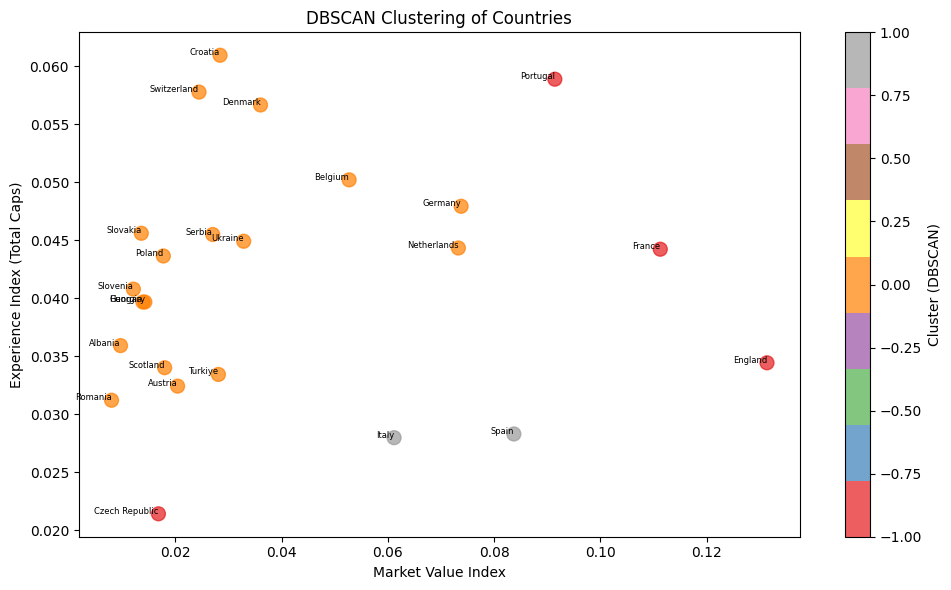

Número de clusters detectados por DBSCAN: 2


In [73]:
from sklearn.cluster import DBSCAN


# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=2)  # puedes ajustar eps y min_samples según tu dataset
country_summary['Cluster_DBSCAN'] = dbscan.fit_predict(scaled_data)

# Graficar resultados
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(country_summary['country_marketValue'], country_summary['Country_experience'],
                     c=country_summary['Cluster_DBSCAN'], cmap='Set1', s=100, alpha=0.7)

ax.set_xlabel('Market Value Index')
ax.set_ylabel('Experience Index (Total Caps)')
ax.set_title('DBSCAN Clustering of Countries')

plt.colorbar(scatter, label='Cluster (DBSCAN)')

# Añadir nombres de los países a cada punto
for i, row in country_summary.iterrows():
    ax.text(row['country_marketValue'], row['Country_experience'], row['Country'], fontsize=6, ha='right')

plt.tight_layout()
plt.show()

# Número de clusters detectados (sin contar outliers, que son -1)
n_clusters_dbscan = len(set(country_summary['Cluster_DBSCAN'])) - (1 if -1 in country_summary['Cluster_DBSCAN'].values else 0)
print(f"Número de clusters detectados por DBSCAN: {n_clusters_dbscan}")


In [72]:
from sklearn.metrics import silhouette_score

# Datos y escalado
data = country_summary[['country_marketValue', 'Country_experience']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# KMEANS 
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)
inertia_kmeans = kmeans.inertia_
silhouette_kmeans = silhouette_score(scaled_data, kmeans_labels)

# MEANSHIFT
meanshift = MeanShift()
meanshift_labels = meanshift.fit_predict(scaled_data)
silhouette_meanshift = silhouette_score(scaled_data, meanshift_labels) if len(set(meanshift_labels)) > 1 else None

# DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=2)
dbscan_labels = dbscan.fit_predict(scaled_data)
# Solo calcular el score si hay al menos 2 clusters (y sin contar los outliers)
if len(set(dbscan_labels)) > 1 and len(set(dbscan_labels)) != 0:
    silhouette_dbscan = silhouette_score(scaled_data, dbscan_labels)
else:
    silhouette_dbscan = None


# Resultados comparativos
print("Resultados de Modelos de Clustering:\n")
print(f"KMeans:")
print(f" - Silhouette Score: {silhouette_kmeans:.3f}")
print()
print("MeanShift:")
print(f" - Silhouette Score: {silhouette_meanshift:.3f}")
print()
print("DBSCAN:")
print(f" - Silhouette Score: {silhouette_dbscan:.3f}" if silhouette_dbscan is not None else " - Silhouette Score: No válido (demasiados outliers o 1 solo cluster)")


Resultados de Modelos de Clustering:

KMeans:
 - Silhouette Score: 0.434

MeanShift:
 - Silhouette Score: 0.298

DBSCAN:
 - Silhouette Score: 0.297


Silhouette Score: mide separación y cohesión (más cerca a 1 es mejor).

### Prediccion

In [ ]:
# Calcular la probabilidad de ganar (70% valor de mercado, 30% experiencia)
country_summary['winning_probability'] = (
    country_summary['country_marketValue'] * 0.7 +
    country_summary['Country_experience'] * 0.3
) * 100

# Redondear a dos decimales
country_summary['winning_probability'] = country_summary['winning_probability'].round(2)

# Mostrar resultados
print(country_summary[['Country', 'winning_probability']])


           Country  winning_probability
0          Albania                 1.76
1          Austria                 2.40
2          Belgium                 5.20
3          Croatia                 3.82
4   Czech Republic                 1.82
5          Denmark                 4.22
6          England                10.23
7           France                 9.12
8          Georgia                 2.16
9          Germany                 6.60
10         Hungary                 2.19
11           Italy                 5.12
12     Netherlands                 6.46
13          Poland                 2.55
14        Portugal                 8.17
15         Romania                 1.50
16        Scotland                 2.28
17          Serbia                 3.26
18        Slovakia                 2.32
19        Slovenia                 2.07
20           Spain                 6.71
21     Switzerland                 3.44
22         Turkiye                 2.97
23         Ukraine                 3.65


In [43]:
# Ordenar los resultados por probabilidad de ganar (de mayor a menor)
sorted_probabilities = country_summary[['Country', 'winning_probability']].sort_values(
    by='winning_probability', ascending=False
)

# Mostrar resultados ordenados
print(sorted_probabilities)

           Country  winning_probability
6          England                10.23
7           France                 9.12
14        Portugal                 8.17
20           Spain                 6.71
9          Germany                 6.60
12     Netherlands                 6.46
2          Belgium                 5.20
11           Italy                 5.12
5          Denmark                 4.22
3          Croatia                 3.82
23         Ukraine                 3.65
21     Switzerland                 3.44
17          Serbia                 3.26
22         Turkiye                 2.97
13          Poland                 2.55
1          Austria                 2.40
18        Slovakia                 2.32
16        Scotland                 2.28
10         Hungary                 2.19
8          Georgia                 2.16
19        Slovenia                 2.07
4   Czech Republic                 1.82
0          Albania                 1.76
15         Romania                 1.50


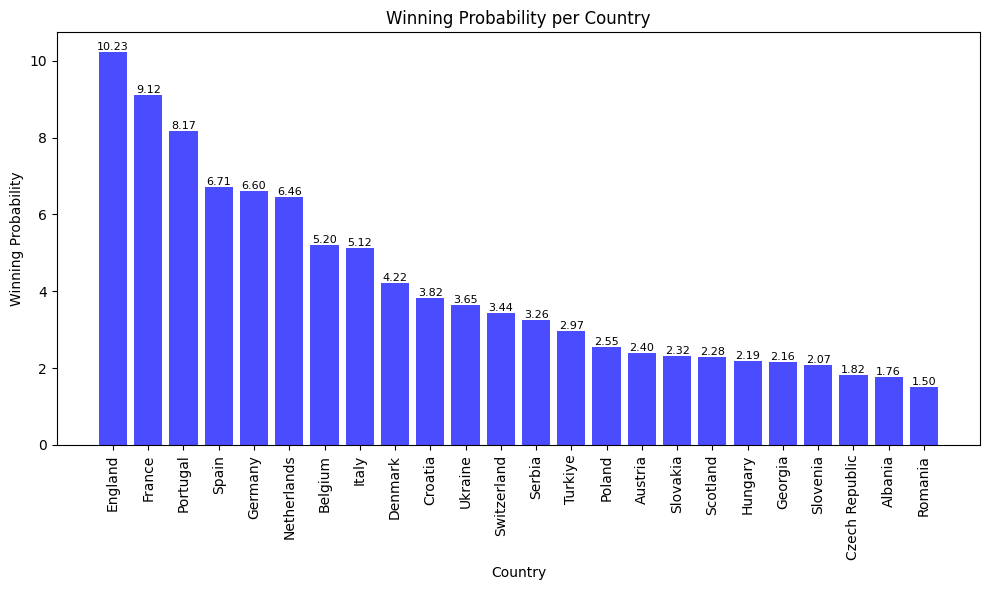

In [44]:
import matplotlib.pyplot as plt

# Crear lista de países ordenada según la probabilidad de ganar
paises_ordenados = country_summary['Country']
probabilidades_ordenadas = country_summary['winning_probability']

# Ordenar los datos de acuerdo con la probabilidad de ganar de mayor a menor
sorted_data = country_summary[['Country', 'winning_probability']].sort_values(by='winning_probability', ascending=False)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Crear gráfico de barras ordenado en orden descendente
bars = ax.bar(sorted_data['Country'], sorted_data['winning_probability'], color='blue', alpha=0.7)

# Añadir etiquetas y título
ax.set_xlabel('Country')
ax.set_ylabel('Winning Probability')
ax.set_title('Winning Probability per Country')

# Rotar etiquetas del eje x para mejor visualización
plt.xticks(rotation=90)

# Mostrar valor numérico encima de cada barra
for bar, prob in zip(bars, sorted_data['winning_probability']):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{prob:.2f}',
            ha='center', va='bottom', fontsize=8)

# Ajustar diseño y mostrar gráfico
plt.tight_layout()
plt.show()


In [45]:
#Descargando resultados de la prediccion en formato CSV
sorted_probabilities.to_csv('euro2024_prediction.csv', index=False)
